In [0]:

import numpy as np
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')
!ls /content/gdrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'My Drive'


In [0]:


import numpy as np
import os
import cv2
import sys
import matplotlib.pyplot as plt

# Define Model here

from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import to_categorical
from keras.applications.vgg16  import VGG16
from keras.applications.resnet50  import ResNet50
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.optimizers import SGD
# snippet of using the LearningRateScheduler callback
from keras.callbacks import LearningRateScheduler
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 


In [0]:

img_width, img_height = 150, 150


In [0]:
epochs = 24
batch_size = 128
img_width, img_height = 150, 150

if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 90
    if epoch % decay_step == 0 and epoch:
      return lr * decay_rate
    return lr
   
        

In [7]:
 
learning_rate = 0.1
decay_rate = 5e-2
momentum = 0.9
#opt = Adam(lr=learning_rate, decay=decay_rate)
opt = SGD(lr=learning_rate,momentum=momentum, decay=decay_rate, nesterov=False)

model = Sequential() 
model.add(Conv2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="softmax"))
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 256)      

In [0]:
data_path = "gdrive/My Drive/CS 564 : Computational Geometry/"

In [28]:

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator()

# this is the augmentation configuration we will use for testing:
 # only rescaling
test_datagen = ImageDataGenerator()

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
train_generator = train_datagen.flow_from_directory(
            data_path+'faces_new_data/train',  # this is the target directory
            target_size=(img_width, img_height),  # all images will be resized to 150x150
            batch_size=batch_size,
            class_mode="categorical")  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
            data_path+'faces_new_data/val',
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode="categorical")
 # this is a similar generator, for validation data
test_generator = test_datagen.flow_from_directory(
            data_path+'faces_new_data/test',
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode="categorical")


Found 4980 images belonging to 2 classes.
Found 2015 images belonging to 2 classes.
Found 1611 images belonging to 2 classes.


In [27]:

history = model.fit_generator( 
            train_generator, 
            steps_per_epoch=30, 
            epochs=epochs, 
            validation_data=validation_generator, 
            validation_steps=10,
            verbose = 1) 
predictions = model.predict(test_generator)
model.save_weights('second_try.h5') 
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Epoch 1/24


KeyboardInterrupt: ignored

In [34]:
learning_rate = 0.05
decay_rate = 5e-3
momentum = 0.9
opt = Adam(lr=learning_rate, decay=decay_rate)
#opt = SGD(lr=learning_rate,momentum=momentum, decay=decay_rate, nesterov=False)
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 74, 74, 32)        128       
_________________________________________________________________
dropout_27 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 36, 36, 64)       

In [35]:

history = model.fit_generator( 
            train_generator, 
            steps_per_epoch=30, 
            epochs=epochs, 
            validation_data=validation_generator, 
            validation_steps=10,
            verbose = 1) 

Epoch 1/24
30/30 [==============================] - 223s 7s/step - loss: 5.6334 - accuracy: 0.5810 - val_loss: 67535.5703 - val_accuracy: 0.5234
Epoch 2/24
30/30 [==============================] - 221s 7s/step - loss: 0.6532 - accuracy: 0.6424 - val_loss: 626.3094 - val_accuracy: 0.5180
Epoch 3/24
30/30 [==============================] - 219s 7s/step - loss: 0.6689 - accuracy: 0.6133 - val_loss: 0.7470 - val_accuracy: 0.5547
Epoch 4/24
30/30 [==============================] - 220s 7s/step - loss: 0.6615 - accuracy: 0.6270 - val_loss: 0.7528 - val_accuracy: 0.5325
Epoch 5/24
30/30 [==============================] - 219s 7s/step - loss: 0.6611 - accuracy: 0.6266 - val_loss: 0.6851 - val_accuracy: 0.5477
Epoch 6/24
30/30 [==============================] - 219s 7s/step - loss: 0.6610 - accuracy: 0.6276 - val_loss: 0.7245 - val_accuracy: 0.5250
Epoch 7/24
30/30 [==============================] - 222s 7s/step - loss: 0.6631 - accuracy: 0.6228 - val_loss: 0.7288 - val_accuracy: 0.5349
Epoch 8

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be beca

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


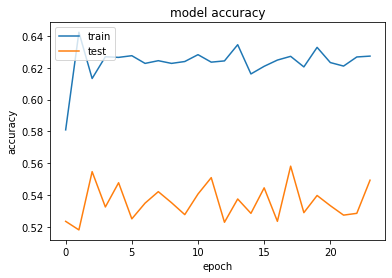

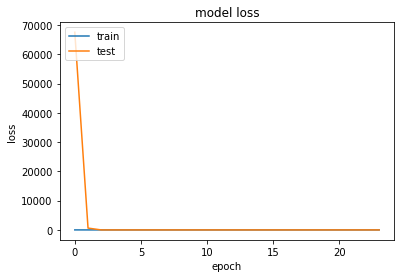

In [36]:
predictions = model.predict(test_generator)
model.save_weights('second_try.h5')
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# ![alt text](https://)